In [1]:
import torch 
import numpy as np

In [2]:
import astropy
from astropy.io import fits
from astropy.coordinates import SkyCoord

In [3]:
from matplotlib import pyplot as plt 
%matplotlib inline

In [4]:
import sys
sys.path.append('../starnet_utils/')
import plotting

In [5]:
hdul_z = fits.open('./data/decaps_l0_b0_hdu08_z')
hdul_i = fits.open('./data/decaps_l0_b0_hdu08_i')

In [6]:
image_z = torch.Tensor(hdul_z[1].data).unsqueeze(0).unsqueeze(0)
image_i = torch.Tensor(hdul_i[1].data).unsqueeze(0).unsqueeze(0)

In [7]:
est_locs_z = np.load('./est_locs_z.npy')

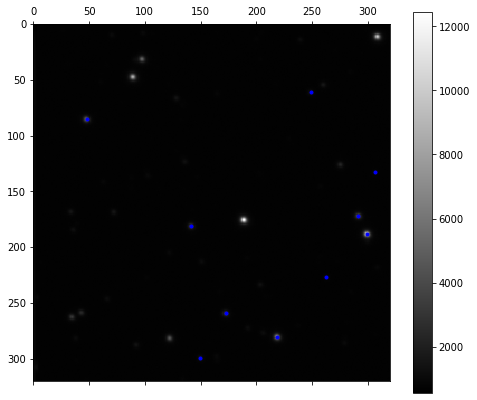

In [9]:
f, axarr = plt.subplots(1, 1, figsize=(8, 7))

im0 = plotting.plot_image(axarr, image_z[0, 0, 0:320, 0:320])
plotting.plot_locations(est_locs_z, axarr, marker = '.')

f.colorbar(im0, ax = axarr)

In [12]:
est_locs_i = np.load('./est_locs_i.npy')

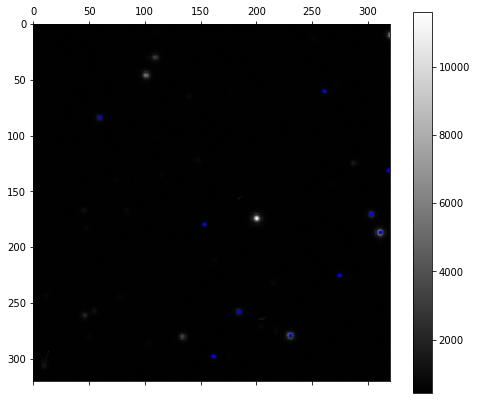

In [13]:
f, axarr = plt.subplots(1, 1, figsize=(8, 7))

im0 = plotting.plot_image(axarr, image_i[0, 0, 0:320, 0:320])
plotting.plot_locations(est_locs_i, axarr, marker = '.')

f.colorbar(im0, ax = axarr)

array([-1.43280554, 11.67188215])

In [22]:
import sys
sys.path.insert(0, '../starnet_utils/')

from m2_data import _get_mgrid2

In [37]:
est_shift = np.median(est_locs_i - est_locs_z, 0)

In [60]:
shift_x0 = np.median(-est_shift[0]) / (image_i.shape[-2] - 1)
shift_x1 = np.median(-est_shift[1]) / (image_i.shape[-1] - 1)
shift = torch.Tensor([[[[shift_x1, shift_x0]]]]) * 2

In [61]:
grid = _get_mgrid2(image_i.shape[-2],
                   image_i.shape[-1]).unsqueeze(0) - shift
out = torch.nn.functional.grid_sample(image_i, grid, align_corners=True)

In [62]:
out.shape

torch.Size([1, 1, 4094, 2046])

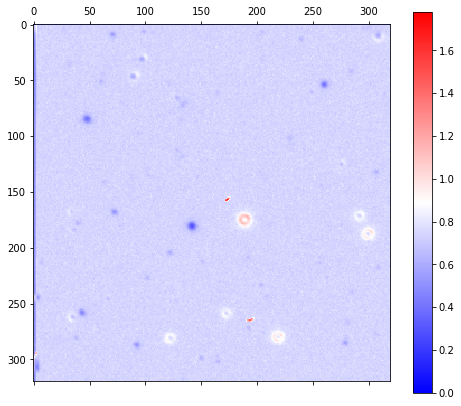

In [63]:
f, axarr = plt.subplots(1, 1, figsize=(8, 7))

im0 = axarr.matshow(out[0, 0, 0:320, 0:320] / image_z[0, 0, 0:320, 0:320], 
                    cmap = plt.get_cmap('bwr'))
# plotting.plot_locations(est_locs_z, axarr, marker = '.')

f.colorbar(im0, ax = axarr)